🪂 **PyTorch Fundamentals** 🪂


What this notebook going to cover: ⚓

| **Topic** | **Contents** |
| ----- | ----- |
| **Introduction to tensors** | Tensors are the basic building block of all of machine learning and deep learning. |
| **Creating tensors** | Tensors can represent almost any kind of data (images, words, tables of numbers). |
| **Getting information from tensors** | If you can put information into a tensor, you'll want to get it out too. |
| **Manipulating tensors** | Machine learning algorithms (like neural networks) involve manipulating tensors in many different ways such as adding, multiplying, combining. |
| **Dealing with tensor shapes** | One of the most common issues in machine learning is dealing with shape mismatches (trying to mix wrong shaped tensors with other tensors). |
| **Indexing on tensors** | If you've indexed on a Python list or NumPy array, it's very similar with tensors, except they can have far more dimensions. |
| **Mixing PyTorch tensors and NumPy** | PyTorch plays with tensors ([`torch.Tensor`](https://pytorch.org/docs/stable/tensors.html)), NumPy likes arrays ([`np.ndarray`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)) sometimes you'll want to mix and match these. |
| **Reproducibility** | Machine learning is very experimental and since it uses a lot of *randomness* to work, sometimes you'll want that *randomness* to not be so random. |
| **Running tensors on GPU** | GPUs (Graphics Processing Units) make your code faster, PyTorch makes it easy to run your code on GPUs. |



In [2]:
print("hello! Promising myself I am eagerly here to learn PyTorch  Fundamentals")

hello! Promising myself I am eagerly here to learn PyTorch  Fundamentals


## Imports/Packages

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.8.0+cu126


## Introduction to Tensors

### Creating tensors
PyTorch loves tensors. So much so there's a whole documentation page dedicated to the [`torch.Tensor`](https://pytorch.org/docs/stable/tensors.html) class.

In [ ]:
# scaler
scaler = torch.tensor(8)
scaler


tensor(8)

In [ ]:
scaler.ndim

0

In [ ]:
# Get tensor back as Python int
scaler.item()

8

In [ ]:
# Vector
vector = torch.tensor([8,4])
vector

tensor([8, 4])

In [ ]:
vector.ndim

1

In [ ]:
vector.shape


torch.Size([2])

In [ ]:
# MATRIX
MATRIX = torch.tensor([[7,8],[9,10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [ ]:
MATRIX.ndim

2

In [ ]:
MATRIX[1][1]
MATRIX.shape

torch.Size([2, 2])

In [ ]:
# TENSOR

TENSOR = torch.tensor([[[1,2,4],
                        [3,6,7],
                        [1,2,1],
                        [4,8,9]]])
TENSOR

tensor([[[1, 2, 4],
         [3, 6, 7],
         [1, 2, 1],
         [4, 8, 9]]])

In [ ]:
TENSOR.ndim

3

In [ ]:
TENSOR[0][3][2]  # 9

tensor(9)

In [ ]:
TENSOR.shape

torch.Size([1, 4, 3])

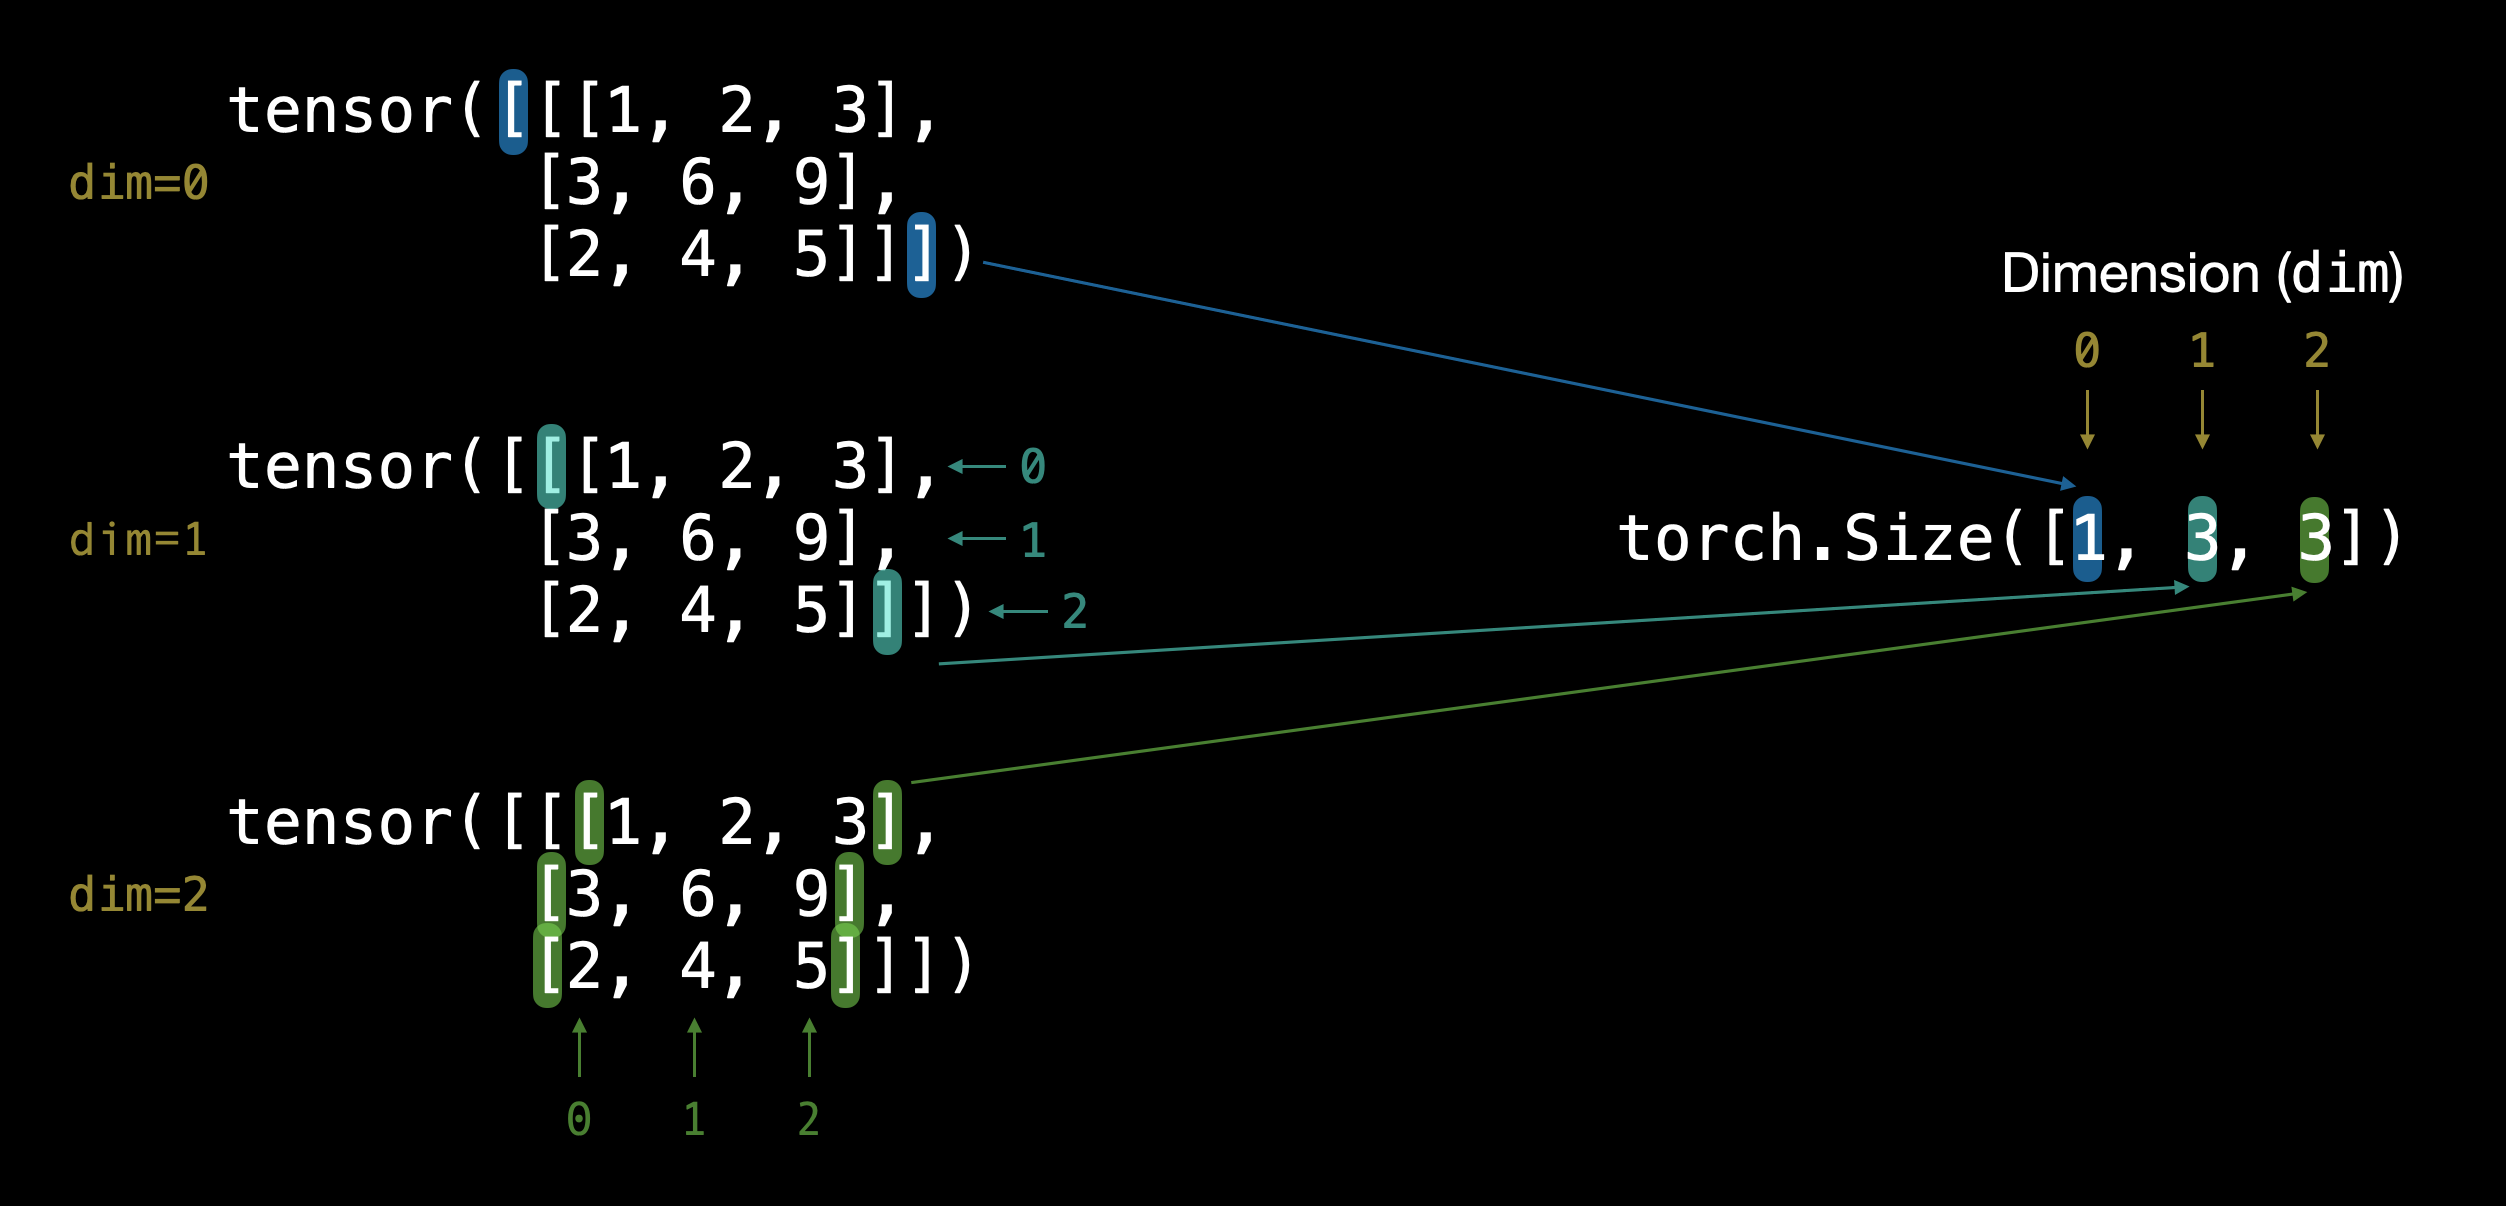

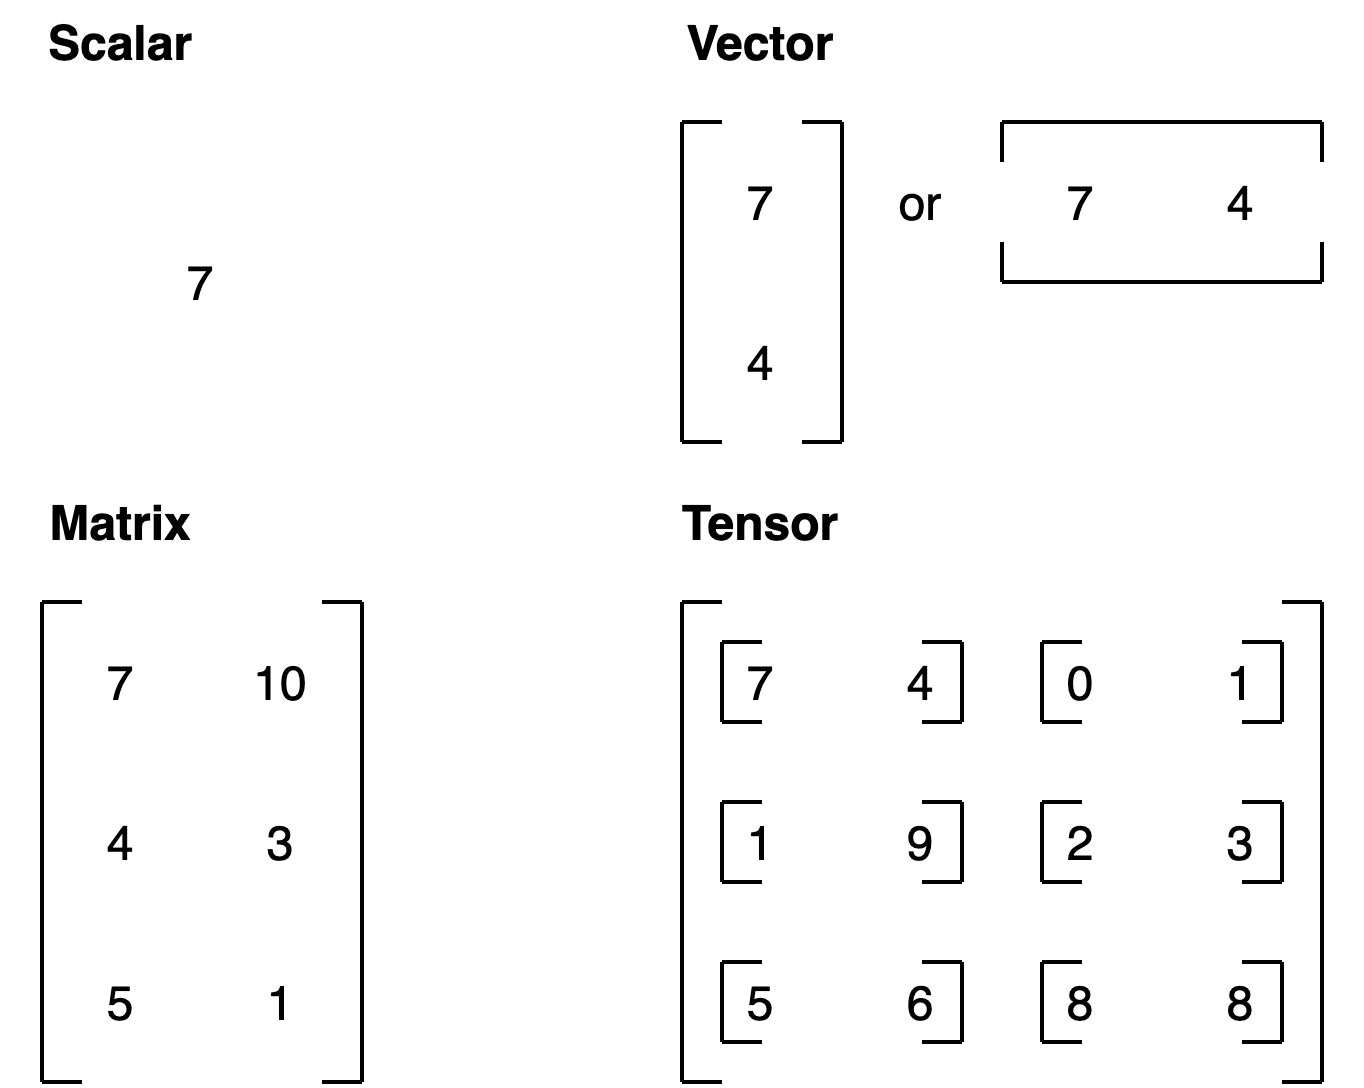

### Random tensors

Why random tensors?

Random tensors are important because the way many neural networks learn is that they start with tensors full of random numbers and then adjust those random numbers to better represent the data

`Start with random numbers --> look at data --> update random numbers --> look at the data --> updates random numbers`

We can do so using [`torch.rand()`](https://pytorch.org/docs/stable/generated/torch.rand.html) and passing in the `size` parameter.

In [ ]:
# Let's create random tensor of size (3,4) with PyTorch
random_tensor = torch.rand(3,3)
random_tensor

tensor([[0.0517, 0.7094, 0.0122],
        [0.4643, 0.4963, 0.2413],
        [0.4646, 0.4304, 0.7487]])

In [ ]:
random_tensor.shape

torch.Size([3, 3])

In [ ]:
# Create a random tensor with similar shape to an image
random_image_size_tensor = torch.rand(size=(3,64,64)) # height, width, colour channels(R,G,B)
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([3, 64, 64]), 3)

### Zeros and ones

In [ ]:
# Create a tensor of all zeros
zeros_tensor = torch.zeros(size=(3,3))
zeros_tensor

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
# Create a tensor of all ones
ones_tensor = torch.ones(size=(3,3)) # deafult=float32 in my machine
ones_tensor

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

### Create a range of tensors and tensors-like

In [ ]:
# use range()
even_upto_ten = torch.arange(2,10+2,2,dtype=float)
even_upto_ten

tensor([ 2.,  4.,  6.,  8., 10.], dtype=torch.float64)

In [ ]:
# create tensors like
ten_zeros = torch.zeros_like(even_upto_ten)
ten_zeros

tensor([0., 0., 0., 0., 0.], dtype=torch.float64)

### Tensor datatypes

In [ ]:
# Float 32 tensor
float32_tensor = torch.tensor([3.0,6.0,9.0],
             dtype=None,
             device=None,
             requires_grad=False)
float32_tensor

tensor([3., 6., 9.])

In [ ]:
float32_tensor.dtype

torch.float32

In [ ]:
float16_tensor = float32_tensor.type(torch.float16)
float16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

In [ ]:
float16_tensor*float32_tensor

tensor([ 9., 36., 81.])

In [ ]:
int32_tensor = torch.tensor([3,6,9],dtype = torch.int32)
int32_tensor

tensor([3, 6, 9], dtype=torch.int32)

In [ ]:
float32_tensor*int32_tensor

tensor([ 9., 36., 81.])

### Getting Information from tensors
## Getting information from tensors

Once you've created tensors (or someone else or a PyTorch module has created them for you), you might want to get some information from them.

We've seen these before but three of the most common attributes you'll want to find out about tensors are:
* `shape` - what shape is the tensor? (some operations require specific shape rules)
* `dtype` - what datatype are the elements within the tensor stored in?
* `device` - what device is the tensor stored on? (usually GPU or CPU)

Let's create a random tensor and find out details about it.

In [ ]:
# Create a tensor
some_tensor = torch.rand(3, 4)

# Find out details about it
print(some_tensor)
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Device tensor is stored on: {some_tensor.device}") # will default to CPU

tensor([[0.9519, 0.2518, 0.0835, 0.3434],
        [0.3956, 0.5721, 0.6472, 0.5859],
        [0.7583, 0.3033, 0.8815, 0.6897]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### Manipulating Tensors (tensor operations)

Tensor Operations Include:
* Addition
* Substraction
* Multiplication (element-wise)
* Division
* Matrix multiplication

In [ ]:
# Create a tensor
tensor = torch.tensor([1,2,3])
tensor

tensor([1, 2, 3])

In [ ]:
# Normal manipulation with tensors
print(tensor+10)
print(tensor*2)
print(tensor-1)
print(tensor/100)


tensor([11, 12, 13])
tensor([2, 4, 6])
tensor([0, 1, 2])
tensor([0.0100, 0.0200, 0.0300])


In [ ]:
# Try out PyTorch in built functions
print(torch.mul(tensor,10))
print(torch.add(tensor,100))
print(torch.sub(tensor,40))
print(torch.div(tensor,4))

tensor([10, 20, 30])
tensor([101, 102, 103])
tensor([-39, -38, -37])
tensor([0.2500, 0.5000, 0.7500])


### Matrix Multiplication

Two main ways of performing multiplication in NN and DL :⚓

✈. Element-wise multiplication

✈. Matrix Multiplication(dot product)

The main two rules for matrix multiplication to remember are:

1. The **inner dimensions** must match:
  * `(3, 2) @ (3, 2)` won't work
  * `(2, 3) @ (3, 2)` will work
  * `(3, 2) @ (2, 3)` will work
2. The resulting matrix has the shape of the **outer dimensions**:
 * `(2, 3) @ (3, 2)` -> `(2, 2)`
 * `(3, 2) @ (2, 3)` -> `(3, 3)`

> **Note:** "`@`" in Python is the symbol for matrix multiplication.

PyTorch implements matrix multiplication functionality in the [`torch.matmul()`](https://pytorch.org/docs/stable/generated/torch.matmul.html) method.

In [ ]:
# Element wise multiplication
print(tensor,"*",tensor)
print(f"Equals: {tensor*tensor}")

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


In [ ]:
# Matrix multiplication
torch.matmul(tensor,tensor)

tensor(14)

In [ ]:
# Matrix Multiplication by hand
1*1+2*2+3*3

14

In [ ]:
%%time
# ms-: millisecond
value=0
for i in range(len(tensor)):
  value+=tensor[i] * tensor[i]

value

CPU times: user 573 µs, sys: 0 ns, total: 573 µs
Wall time: 790 µs


tensor(14)

In [ ]:
%%time
# µs-: microsecond
torch.matmul(tensor,tensor)

CPU times: user 72 µs, sys: 12 µs, total: 84 µs
Wall time: 89.4 µs


tensor(14)

![visual demo of matrix multiplication](https://github.com/mrdbourke/pytorch-deep-learning/raw/main/images/00-matrix-multiply-crop.gif)

You can create your own matrix multiplication visuals like this at http://matrixmultiplication.xyz/.

In [ ]:
torch.matmul(torch.rand(3,2),torch.rand(2,3))

tensor([[0.4627, 0.6653, 0.4445],
        [0.4358, 0.9533, 0.7494],
        [0.2986, 0.3439, 0.2003]])

In [ ]:
torch.matmul(torch.rand(10,2),torch.rand(2,10)).shape

torch.Size([10, 10])

### One of the most common errors in DL are Shape Error

In [ ]:
## GET'S ERROR BY RUNNING THIS CODE
# Shapes for matrix multiplication
tensor_A = torch.tensor([[1,2],
                         [3,4],
                         [5,6]])

tensor_B = torch.tensor([[4,5],
                         [9,0],
                         [3,2]])

# torch.mm(tensor_A,tensor_B) # mm --> matmul

#### To fix our tensor shape issues, we can manipulate the shape of our tensors using ✒ **Transpose**

In [ ]:
print(tensor_B.shape)
print(tensor_B.T.shape)

torch.Size([3, 2])
torch.Size([2, 3])


In [ ]:
# Shapes for matrix multiplication
tensor_A = torch.tensor([[1,2],
                         [3,4],
                         [5,6]])

tensor_B = torch.tensor([[4,5],
                         [9,0],
                         [3,2]])

torch.mm(tensor_A,tensor_B.T) # mm --> matmul
# solve error by **transpose**

tensor([[14,  9,  7],
        [32, 27, 17],
        [50, 45, 27]])

### Finding the min,max,mean,sum,count,etc..(tensor aggregation)

In [ ]:
x = torch.arange(0,100,10)
print(x)
print(torch.min(x))
print(torch.max(x))
print(torch.mean(x.type(dtype=torch.float32)))
print(torch.median(x))
print(torch.sum(x))
print(torch.count_nonzero(x))

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
tensor(0)
tensor(90)
tensor(45.)
tensor(40)
tensor(450)
tensor(9)


#### Finding the positional min and max

In [ ]:
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [ ]:
x.argmax()

tensor(9)

In [ ]:
x.argmin()

tensor(0)

### reshaping, viewing and stacking tensors

| Method | One-line description |
| ----- | ----- |
| [`torch.reshape(input, shape)`](https://pytorch.org/docs/stable/generated/torch.reshape.html#torch.reshape) | Reshapes `input` to `shape` (if compatible), can also use `torch.Tensor.reshape()`. |
| [`Tensor.view(shape)`](https://pytorch.org/docs/stable/generated/torch.Tensor.view.html) | Returns a view of the original tensor in a different `shape` but shares the same data as the original tensor. |
| [`torch.stack(tensors, dim=0)`](https://pytorch.org/docs/1.9.1/generated/torch.stack.html) | Concatenates a sequence of `tensors` along a new dimension (`dim`), all `tensors` must be same size. |
| [`torch.squeeze(input)`](https://pytorch.org/docs/stable/generated/torch.squeeze.html) | Squeezes `input` to remove all the dimenions with value `1`. |
| [`torch.unsqueeze(input, dim)`](https://pytorch.org/docs/1.9.1/generated/torch.unsqueeze.html) | Returns `input` with a dimension value of `1` added at `dim`. |
| [`torch.permute(input, dims)`](https://pytorch.org/docs/stable/generated/torch.permute.html) | Returns a *view* of the original `input` with its dimensions permuted (rearranged) to `dims`. |

In [ ]:
# Let's create tensor
x = torch.arange(1., 21.)
x, x.shape

(tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
         15., 16., 17., 18., 19., 20.]),
 torch.Size([20]))

In [ ]:
# reshape
x_reshaped = x.reshape(1,20)
x_reshaped.shape

torch.Size([1, 20])

In [ ]:
# view
z = x_reshaped.view(5,4)
z, z.shape

(tensor([[ 1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.],
         [ 9., 10., 11., 12.],
         [13., 14., 15., 16.],
         [17., 18., 19., 20.]]),
 torch.Size([5, 4]))

In [ ]:
# stack
# vstack
# hstack
# Stack tensors on top of each other
x_stacked = torch.stack([x, x, x, x], dim=1) # try changing dim to dim=1 and see what happens
x_stacked

tensor([[ 1.,  1.,  1.,  1.],
        [ 2.,  2.,  2.,  2.],
        [ 3.,  3.,  3.,  3.],
        [ 4.,  4.,  4.,  4.],
        [ 5.,  5.,  5.,  5.],
        [ 6.,  6.,  6.,  6.],
        [ 7.,  7.,  7.,  7.],
        [ 8.,  8.,  8.,  8.],
        [ 9.,  9.,  9.,  9.],
        [10., 10., 10., 10.],
        [11., 11., 11., 11.],
        [12., 12., 12., 12.],
        [13., 13., 13., 13.],
        [14., 14., 14., 14.],
        [15., 15., 15., 15.],
        [16., 16., 16., 16.],
        [17., 17., 17., 17.],
        [18., 18., 18., 18.],
        [19., 19., 19., 19.],
        [20., 20., 20., 20.]])

#### squeezing, unsqueezing, and permuting tensors

In [ ]:
# torch.squeeze() - removes all single  dimension from target tensor
print(x_reshaped)
print(x_reshaped.shape)
x_reshaped = x_reshaped.squeeze()  # Assign back
print(x_reshaped.shape)  # torch.Size([20])

tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
         15., 16., 17., 18., 19., 20.]])
torch.Size([1, 20])
torch.Size([20])


In [ ]:
# torch.unsqueeze - adds a single single dimension in target tensor
print(x_reshaped.shape)
x_reshaped = x_reshaped.unsqueeze(dim =0)
print(x_reshaped.shape)


torch.Size([20])
torch.Size([1, 20])


In [ ]:
# torch.permute - rearranges the dimension of the target tensor in a specified order
y = torch.rand(64,64,3)
print(y.shape)
y_permuted = torch.permute(y, (2,0,1))
print(y_permuted.shape)

torch.Size([64, 64, 3])
torch.Size([3, 64, 64])


In [ ]:
y[0,0,0] = 23247

In [ ]:
y[0,0,0],y_permuted[0,0,0]

(tensor(23247.), tensor(23247.))

> ⛳
 **Note**: Because permuting returns a *view* (shares the same data as the original), the values in the permuted tensor will be the same as the original tensor and if you change the values in the view, it will change the values of the original.

### Indexing (selecting data from tensors)

Indexing with PyTorch is similar to indexing with Numpy

In [ ]:
# create a tensor
import torch
x = torch.arange(1,10).reshape(1,3,3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [ ]:
x[0][1][2] #6

tensor(6)

In [ ]:
x[0,2,2] #9

tensor(9)

In [ ]:
x[:,1,2] #6

tensor([6])

In [ ]:
x[:,2,2] #9

tensor([9])

### PyTorch Tensors & Numpy

NumPy is a popular scientific python numerical computing library.

And because of this , PyTorch has functionality to interact with it.

The two main methods you'll want to use for NumPy to PyTorch (and back again) are:
* [`torch.from_numpy(ndarray)`](https://pytorch.org/docs/stable/generated/torch.from_numpy.html) - NumPy array -> PyTorch tensor.
* [`torch.Tensor.numpy()`](https://pytorch.org/docs/stable/generated/torch.Tensor.numpy.html) - PyTorch tensor -> NumPy array.

> **Note:** By default, NumPy arrays are created with the datatype `float64` and if you convert it to a PyTorch tensor, it'll keep the same datatype (as above).
>
> However, many PyTorch calculations default to using `float32`.
>
> So if you want to convert your NumPy array (float64) -> PyTorch tensor (float64) -> PyTorch tensor (float32), you can use `tensor = torch.from_numpy(array).type(torch.float32)`.

Because we reassigned `tensor` above, if you change the tensor, the array stays the same.

In [ ]:
# Numpy array to tensor
import torch
import numpy as np

array  = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array).type(torch.float32)
array, array.shape, tensor, tensor.shape

(array([1., 2., 3., 4., 5., 6., 7.]),
 (7,),
 tensor([1., 2., 3., 4., 5., 6., 7.]),
 torch.Size([7]))

In [ ]:
# Change the tensor, keep the array the same
tensor = tensor + 1
tensor, array

(tensor([3., 4., 5., 6., 7., 8., 9.]), array([1., 2., 3., 4., 5., 6., 7.]))

In [ ]:
# Tensor to Numpy array
tensor = torch.ones(9)
numpy_tensor = tensor.numpy()
tensor , numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [ ]:
# Change the tensor, keep the array the same
tensor = tensor + 1
tensor, numpy_tensor


(tensor([2., 2., 2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32))

## Reproducibility

We've discussed neural networks start with random numbers to describe patterns in data (these numbers are poor descriptions) and try to improve those random numbers using tensor operations (and a few other things we haven't discussed yet) to better describe patterns in data.

In other words, can you get the same (or very similar) results on your computer running the same code as I get on mine?

Let's see a brief example of reproducibility in PyTorch.

We'll start by creating two random tensors, since they're random, you'd expect them to be different right?

**Note** ♨ To reduce the randomness in NN and PyTorch comes the concept of **random seed**.

Essentially what the random seed does is "flavour" the randomness


In [ ]:
import torch

# create two random tensors
random_tensor_A = torch.rand(3,4)
random_tensor_B = torch.rand(3,4)

print(random_tensor_A)
print(random_tensor_B)
print(random_tensor_A == random_tensor_B)

tensor([[0.7919, 0.5487, 0.6275, 0.3697],
        [0.3444, 0.2172, 0.8661, 0.2644],
        [0.5399, 0.3178, 0.1156, 0.3384]])
tensor([[0.0727, 0.5450, 0.8479, 0.3152],
        [0.3181, 0.2495, 0.7279, 0.2787],
        [0.8194, 0.2037, 0.0366, 0.3662]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [ ]:
# Let's make some random but reproducible tensors

# set the random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3,4)

torch.manual_seed(RANDOM_SEED)
random_tensor_D = torch.rand(3,4)

print(random_tensor_C)
print(random_tensor_D)
print(random_tensor_C == random_tensor_D)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


> * [The PyTorch reproducibility documentation](https://pytorch.org/docs/stable/notes/randomness.html) (a good exercise would be to read through this for 10-minutes and even if you don't understand it now, being aware of it is important).
> * [The Wikipedia random seed page](https://en.wikipedia.org/wiki/Random_seed) (this'll give a good overview of random seeds and pseudorandomness in general).

### Running tensors and PyTorch objects on the GPUs(and making faster computations)

GPUs ⚡ = Faster computation on numbers, thanks to CUDA + NVIDIA hardware  + PyTrch working behind the scenes to make everything hunky

🏹 Easiest - Use Google colab for a free GPU

In [ ]:
!nvidia-smi

Sun Sep  7 06:46:53 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   67C    P8             14W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Check for GPU access with PyTorch
import torch
torch.cuda.is_available()

True

In [ ]:
# Setup device agnostic code
device  =  "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
torch.cpu.device_count()

1

### 3. Putting tensors(and models) on the GPU

The reason we want our tensors/models on the GPU is because using GPU results in faster computation


In [ ]:
# Create a tensor (default on the cpu)
tensor = torch.tensor([1,2,3])

#Tensor not on GPU
print(tensor, tensor.device)



tensor([1, 2, 3]) cpu


In [ ]:
# Move tensor to GPU(if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

### 4. Moving tensors back to the CPU

In [ ]:
# If tensor is on GPU, can't transform it to NumPy
# tensor_on_gpu.numpy()
# ERROR THROUGH

In [ ]:
# To fix the GPU tensor with Numpy issue, we can first set it to the CPU
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu, tensor_back_on_cpu.device

(array([1, 2, 3]), 'cpu')

In [ ]:
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

#💥

In [ ]:
print("""So...You Just Completed the Very Essential PyTorch Fundamentals,
Share this Notebook with Others as well and
Keep Happy learning and Working """)

So...You Just Completed the Very Essential PyTorch Fundamentals,
Share this Notebook with Others as well and
Keep Happy learning and Working 


▶ So You just completed The Notebook Right and Want More◀

For Practice Here is Exercise : ✉

**Resources:**

* [Exercise template notebook for 00](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/00_pytorch_fundamentals_exercises.ipynb).
* [Example solutions notebook for 00](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/00_pytorch_fundamentals_exercise_solutions.ipynb)   (try the exercises *before* looking at this).
